In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
tv_usage_info = pd.read_csv("data/PEO TV usage Information.csv")

tv_usage_info

,Phone Number,Phone Number.hash,Peo TV Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,
0,912287049,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,
1,912287049,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,
2,912286967,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,
3,912286967,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,
4,912286838,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87:20:55,70:51:48,101:49:22,72:31:40,120:04:35,115:43:49,67:52:13,93:45:58,R-GL,IM-NODE,UA5000(IPMB),39153,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,112054356,5fc30724801d125e0048b486655723f6,PEO_SILVER,94:30:06,103:19:48,68:31:40,77:38:02,106:20:08,91:02:10,78:00:14,67:34:16,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2589,112053643,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2590,112053643,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2591,112053582,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0,0,0,0,0,0,41:19:59,83:00:07,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,


In [3]:
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating usage time- bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# No of users by PEO TV Package
# Most used PEO TV Package Ranking
# User profile dim table
# visualize and analyze data

In [4]:
tv_usage_info = tv_usage_info.drop(['Phone Number'], axis=1)
tv_usage_info.rename(columns={'Phone Number.hash': 'Phone_Number.hash','Peo TV Package':'Peo_TV_Package'}, inplace=True)
tv_usage_info = tv_usage_info.drop_duplicates(['Phone_Number.hash',"Peo_TV_Package"], keep='last')
tv_usage_info

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,
5,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87:20:55,70:51:48,101:49:22,72:31:40,120:04:35,115:43:49,67:52:13,93:45:58,R-GL,IM-NODE,UA5000(IPMB),39153,1,
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0,0,0,0,0,0,0,0,R-GL,IM-NODE,UA5000(IPMB),39153,1,
8,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,136:30:47,135:25:03,175:06:08,113:26:17,172:44:24,197:38:25,238:42:03,211:05:27,R-GL,IM-NODE,UA5000(IPMB),39153,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,192:51:09,244:12:12,202:34:10,165:56:50,208:13:58,221:02:06,198:33:15,214:59:42,R-HK,HK-OCC-NODE,MSAG5200-ISL,50656,1,
2587,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0,0,0,0,0,0,0,0,R-HK,HK-OCC-NODE,MSAG5200-ISL,50656,1,
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,94:30:06,103:19:48,68:31:40,77:38:02,106:20:08,91:02:10,78:00:14,67:34:16,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,


In [5]:
tv_usage_info.isnull().sum(axis=0)

Phone_Number.hash      0
Peo_TV_Package         0
usage_08_20 (hh:mm)    0
usage_07_20 (hh:mm)    0
usage_06_20 (hh:mm)    0
usage_05_20 (hh:mm)    0
usage04_20 (hh:mm)     0
usage_03_20 (hh:mm)    0
usage_02_20 (hh:mm)    0
usage_01_20 (hh:mm)    0
RTOM_CODE              0
LOCATION_CODE          0
MSAN                   0
EQUP_ID                0
EQUP_INDEX             0
                       0
dtype: int64

# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Upload/Download/Duration
- 3. Usage Rank
- 4. Labling usage

In [6]:
tv_usage = tv_usage_info.drop(['RTOM_CODE','LOCATION_CODE','MSAN','EQUP_ID','EQUP_INDEX'], axis=1)
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,
5,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87:20:55,70:51:48,101:49:22,72:31:40,120:04:35,115:43:49,67:52:13,93:45:58,
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0,0,0,0,0,0,0,0,
8,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,136:30:47,135:25:03,175:06:08,113:26:17,172:44:24,197:38:25,238:42:03,211:05:27,
...,...,...,...,...,...,...,...,...,...,...,...
2585,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,192:51:09,244:12:12,202:34:10,165:56:50,208:13:58,221:02:06,198:33:15,214:59:42,
2587,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0,0,0,0,0,0,0,0,
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,94:30:06,103:19:48,68:31:40,77:38:02,106:20:08,91:02:10,78:00:14,67:34:16,
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,


In [7]:
usage_cols = ['usage_08_20 (hh:mm)','usage_07_20 (hh:mm)','usage_06_20 (hh:mm)','usage_05_20 (hh:mm)','usage04_20 (hh:mm)','usage_03_20 (hh:mm)','usage_02_20 (hh:mm)','usage_01_20 (hh:mm)']

### Transforminbg duration values to float values in Hours

In [8]:
def get_duration(val):
    time= 0
    if val != "0":
        val_list = val.split(":")
        time = int(val_list[0]) + int(val_list[1])/60
    return time

In [9]:
#test case 1
get_duration("145:09:52")

145.15

In [10]:
# test case 2
get_duration("0")

0

In [11]:
# fixing usage durations
for col in usage_cols:
    tv_usage[col] = tv_usage[col].apply(lambda x: get_duration(x))
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145.150000,159.250000,183.650000,212.116667,311.700000,251.400000,132.233333,225.800000,
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15.216667,11.516667,17.433333,32.166667,79.183333,92.666667,16.966667,21.266667,
5,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87.333333,70.850000,101.816667,72.516667,120.066667,115.716667,67.866667,93.750000,
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,
8,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,136.500000,135.416667,175.100000,113.433333,172.733333,197.633333,238.700000,211.083333,
...,...,...,...,...,...,...,...,...,...,...,...
2585,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,192.850000,244.200000,202.566667,165.933333,208.216667,221.033333,198.550000,214.983333,
2587,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,94.500000,103.316667,68.516667,77.633333,106.333333,91.033333,78.000000,67.566667,
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72.816667,92.083333,86.350000,104.100000,151.900000,113.950000,74.233333,92.300000,


### Usage ratings for year-month

In [12]:
tv_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm)
count,1428.00000,1428.00000,1428.00000,1428.00000,1428.00000,1428.00000,1428.00000,1428.00000
mean,94.34700,104.30008,97.35943,73.10051,106.76998,106.35979,93.02690,101.47883
std,118.65254,127.48594,119.67962,86.37740,124.25824,123.20679,114.96505,123.34116
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,59.08333,61.35000,59.07500,49.12500,74.85833,76.80000,59.80000,66.05000
75%,141.67917,162.76250,151.57500,117.85000,170.72500,167.20833,140.56667,162.55000
max,743.71667,734.26667,695.78333,470.40000,664.70000,678.68333,669.75000,679.35000


In [13]:
# test
# Freedman-Diaconis’s Rule for binnig
def fd_rule(q1,q3,n):
    iqr=q3-q1
    return 2*(iqr/(n**(1.0/3.0)))

In [14]:
# binning call_count
usage_bins = [0,30,60,150,744]
for col in usage_cols:
    tv_usage[col] = np.searchsorted(usage_bins, tv_usage[col].values)
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,3,4,4,4,4,4,3,4,
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,1,1,1,2,3,3,1,1,
5,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,3,3,3,3,3,3,3,3,
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0,0,0,0,0,0,0,0,
8,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,3,3,4,3,4,4,4,4,
...,...,...,...,...,...,...,...,...,...,...,...
2585,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,4,4,4,4,4,4,4,4,
2587,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0,0,0,0,0,0,0,0,
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,3,3,3,3,3,3,3,3,
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,3,3,3,3,4,3,3,3,


### Min Max Scalaer

In [15]:
# scaling usage rating
scaler = MinMaxScaler()
for col in usage_cols:
    tv_usage[col] = scaler.fit_transform(tv_usage[col].values.reshape(-1,1))

<AxesSubplot:>

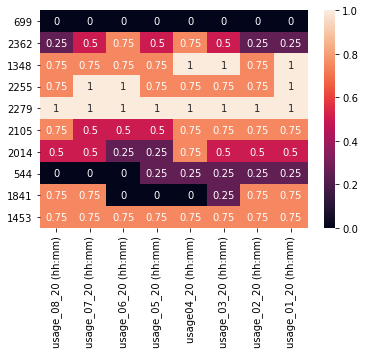

In [16]:
sns.heatmap(tv_usage[usage_cols].sample(n=10), annot=True)

<AxesSubplot:>

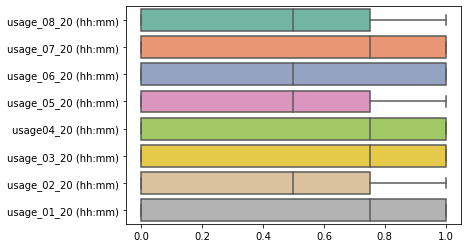

In [18]:
ax = sns.boxplot(data=tv_usage[[x for x in usage_cols]], orient="h", palette="Set2")
ax

In [19]:
tv_usage['Usage_Rating_Scaled'] = tv_usage[usage_cols].sum(axis=1)/len(usage_cols)
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),,Usage_Rating_Scaled
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625
5,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00000
8,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,0.75,0.75,1.00,0.75,1.00,1.00,1.00,1.00,,0.90625
...,...,...,...,...,...,...,...,...,...,...,...,...
2585,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,,1.00000
2587,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00000
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125


In [20]:
# labling usage bins
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
tv_usage['Usage_Rating_Categorical'] = pd.cut(tv_usage['Usage_Rating_Scaled'], bins=bins, labels=labels)
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),,Usage_Rating_Scaled,Usage_Rating_Categorical
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750,HIGH
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625,MEDIUM
5,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00000,NaN
8,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,0.75,0.75,1.00,0.75,1.00,1.00,1.00,1.00,,0.90625,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,,1.00000,HIGH
2587,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00000,NaN
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125,HIGH


In [21]:
# adding category "NO" 
tv_usage['Usage_Rating_Categorical'] = tv_usage['Usage_Rating_Categorical'].cat.add_categories("NO")
tv_usage.loc[tv_usage['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
tv_usage[(tv_usage['Usage_Rating_Scaled'] == 0.0)]

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),,Usage_Rating_Scaled,Usage_Rating_Categorical
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
18,82dec366d337db00245e0e6963195fb6,PEO_UTHAYAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
20,e513ea561737d58fe19c475b14959929,DOUBLEPROMO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
28,502177e7eaecfb7f42f6ba57e45a303f,PEO_SILVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
36,9f0a02155f92685e7b5d51dc51655d91,PEO_SILVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,3097b0c0d4a8cd24fbcd197491c998de,PEO_SILVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
2572,62ff1f7426058b9c721aee1b897cd378,PEO_SILVER_PLUS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
2575,ba2cd0a629f9bd5acc9d7fcd89971dad,PEO_SILVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
2583,043588932b222223b85a714e32f6c1f2,PEO_SILVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO


### Fina Result: Usage Ratings

In [22]:
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),,Usage_Rating_Scaled,Usage_Rating_Categorical
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750,HIGH
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625,MEDIUM
5,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00000,NO
8,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,0.75,0.75,1.00,0.75,1.00,1.00,1.00,1.00,,0.90625,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,,1.00000,HIGH
2587,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00000,NO
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125,HIGH


In [23]:
tv_usage.to_csv("data/user_profile/PEO_TV_Usage_Categorical.csv")

# Phase 2

## Binnig by Location 

- 1. group by location columns
- 2. Bin by location and get counts

In [24]:
# bucketing by location
tv_location_info = tv_usage_info
tv_location_info['Location_Identifier'] = tv_location_info['LOCATION_CODE'].astype(str)+ tv_location_info['MSAN'].astype(str) +tv_location_info['EQUP_ID'].astype(str) +tv_location_info['EQUP_INDEX'].astype(str)
tv_location_info

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,,Location_Identifier
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
5,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87:20:55,70:51:48,101:49:22,72:31:40,120:04:35,115:43:49,67:52:13,93:45:58,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0,0,0,0,0,0,0,0,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
8,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,136:30:47,135:25:03,175:06:08,113:26:17,172:44:24,197:38:25,238:42:03,211:05:27,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,192:51:09,244:12:12,202:34:10,165:56:50,208:13:58,221:02:06,198:33:15,214:59:42,R-HK,HK-OCC-NODE,MSAG5200-ISL,50656,1,,HK-OCC-NODEMSAG5200-ISL506561
2587,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0,0,0,0,0,0,0,0,R-HK,HK-OCC-NODE,MSAG5200-ISL,50656,1,,HK-OCC-NODEMSAG5200-ISL506561
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,94:30:06,103:19:48,68:31:40,77:38:02,106:20:08,91:02:10,78:00:14,67:34:16,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,,WI-NWT-NODEMSAG5200-ISL485201
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,,WI-NWT-NODEMSAG5200-ISL485201


In [25]:
tv_location_info = tv_location_info.drop_duplicates("Phone_Number.hash", keep="last")
tv_location_info.shape

(1428, 17)

In [26]:
tv_location_info["User_Count"] = 1
tv_gropued_by_locations = tv_location_info.groupby(['Location_Identifier'], axis=0,as_index=False).sum()
tv_location_info = tv_gropued_by_locations[['Location_Identifier','User_Count']]

In [27]:
tv_location_info

,Location_Identifier,User_Count
0,AD-SRV-NODEMA5603T10224991,4
1,AG-PNP-NODEZXDSL9806H-ISL529761,7
2,BG-NODEMSAG5200431391,133
3,BZ-NODEMSAG5200-ISL435881,67
4,GE-NODEMSAG5200-ISL5577981,5
5,HC-NAP-NODEMSAG5200-ISL478721,7
6,HE-DMD-NODEC300M15221561,6
7,HK-OCC-NODEMSAG5200-ISL506561,8
8,HNT-NODEMSAG5200-ISL423851,13
9,HO-NODEMSAG5200-ISL524692,1


In [28]:
tv_usage.to_csv("data/user_profile/PEO_TV_Location_User_Count.csv")

In [29]:
tv_location_info['Location_Identifier'] = tv_location_info['Location_Identifier'].astype('category')

<ipython-input-29-8141b807b830>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_location_info['Location_Identifier'] = tv_location_info['Location_Identifier'].astype('category')


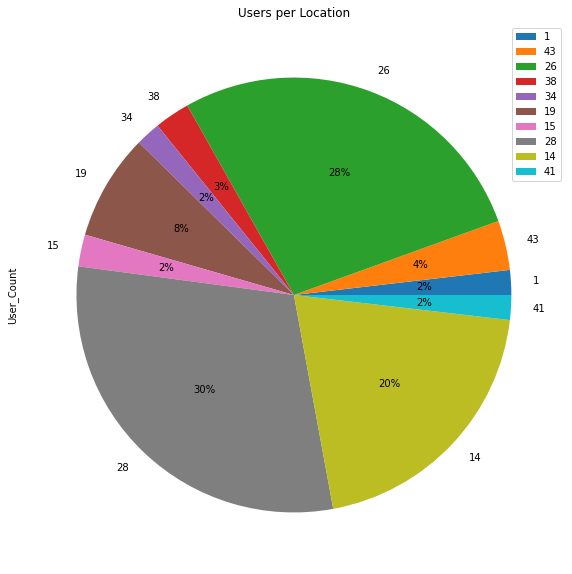

In [30]:
#tv_package_info.plot(x="User_Count", y="Peo_TV_Package")
loc_plot = tv_location_info.sample(n=10).plot(kind="pie",y="User_Count",title='Users per Location',figsize=(20,10),autopct='%1.0f%%')

[Text(0.5, 0, 'Peo TV Locations(Indexes)'), Text(0, 0.5, 'No of Users')]

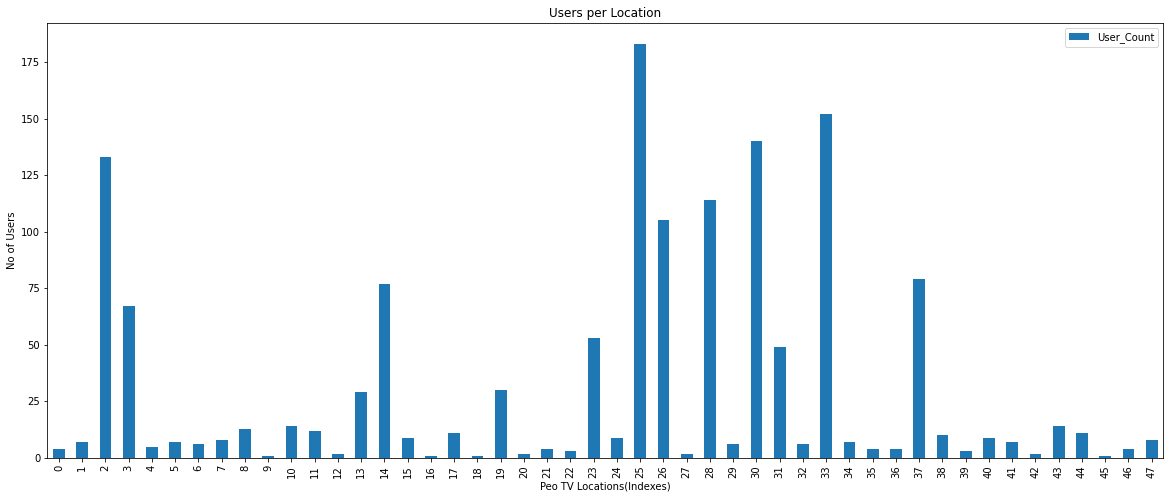

In [31]:
#tv_package_info.plot(x="User_Count", y="Peo_TV_Package")
tv_loc_plot = tv_location_info.plot(kind="bar",title='Users per Location',figsize=(20,8))
tv_loc_plot.set(xlabel='Peo TV Locations(Indexes)',ylabel='No of Users')

# Phase 3

## Binnig by Peo TV Package 

- 1. group by location columns
- 2. Bin by location and get counts

In [32]:
tv_usage_info

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,,Location_Identifier
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
5,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87:20:55,70:51:48,101:49:22,72:31:40,120:04:35,115:43:49,67:52:13,93:45:58,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0,0,0,0,0,0,0,0,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
8,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,136:30:47,135:25:03,175:06:08,113:26:17,172:44:24,197:38:25,238:42:03,211:05:27,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,192:51:09,244:12:12,202:34:10,165:56:50,208:13:58,221:02:06,198:33:15,214:59:42,R-HK,HK-OCC-NODE,MSAG5200-ISL,50656,1,,HK-OCC-NODEMSAG5200-ISL506561
2587,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0,0,0,0,0,0,0,0,R-HK,HK-OCC-NODE,MSAG5200-ISL,50656,1,,HK-OCC-NODEMSAG5200-ISL506561
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,94:30:06,103:19:48,68:31:40,77:38:02,106:20:08,91:02:10,78:00:14,67:34:16,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,,WI-NWT-NODEMSAG5200-ISL485201
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,,WI-NWT-NODEMSAG5200-ISL485201


In [33]:
user_location = tv_usage_info[['Phone_Number.hash','Peo_TV_Package','Location_Identifier']]
user_location

,Phone_Number.hash,Peo_TV_Package,Location_Identifier
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,IM-NODEUA5000(IPMB)391531
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,IM-NODEUA5000(IPMB)391531
5,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,IM-NODEUA5000(IPMB)391531
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,IM-NODEUA5000(IPMB)391531
8,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,IM-NODEUA5000(IPMB)391531
...,...,...,...
2585,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,HK-OCC-NODEMSAG5200-ISL506561
2587,013736757d2ddad83cdfaa418921605c,PEO_SILVER,HK-OCC-NODEMSAG5200-ISL506561
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,WI-NWT-NODEMSAG5200-ISL485201
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,WI-NWT-NODEMSAG5200-ISL485201


In [34]:
user_location.to_csv("data/user_profile/PEO_TV_Locations_of_Users.csv")

In [35]:
tv_package_info = tv_usage_info[['Peo_TV_Package']]
tv_package_info["User_Count"] = 1
tv_package_info = tv_package_info.groupby(['Peo_TV_Package'], axis=0,as_index=False).sum()

tv_package_info

<ipython-input-35-83d68e485037>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_package_info["User_Count"] = 1


,Peo_TV_Package,User_Count
0,BOC,5
1,DOUBLEPROMO,2
2,LEISURE_SPORTS,1
3,LOTUS,2
4,NEW_SLT_STAFF_PACKAGE,9
5,NEW_YEAR_TREAT,6
6,PEO_ENTERTAINMENT,18
7,PEO_FAMILY,1
8,PEO_GOLD,6
9,PEO_PLATINUM,4


In [36]:
tv_package_info.to_csv("data/user_profile/PEO_TV_Package_User_Count.csv")

In [37]:
tv_package_info['Peo_TV_Package'] = tv_package_info['Peo_TV_Package'].astype('category')

[Text(0.5, 0, 'Peo TV Packages(Indexes)'), Text(0, 0.5, 'No of Users')]

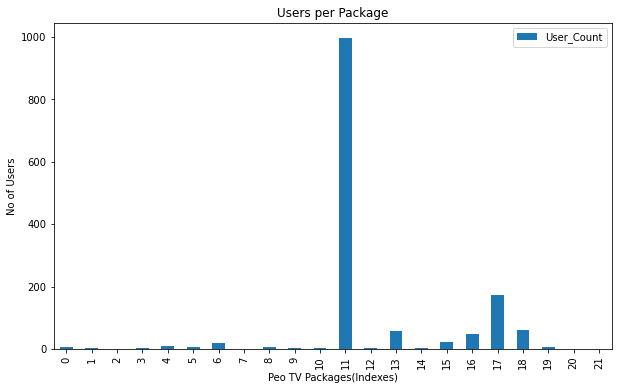

In [38]:
#tv_package_info.plot(x="User_Count", y="Peo_TV_Package")
bar_plot = tv_package_info.plot(kind="bar",title='Users per Package',figsize=(10,6))
bar_plot.set(xlabel='Peo TV Packages(Indexes)',ylabel='No of Users')